In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv("shampoo1.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


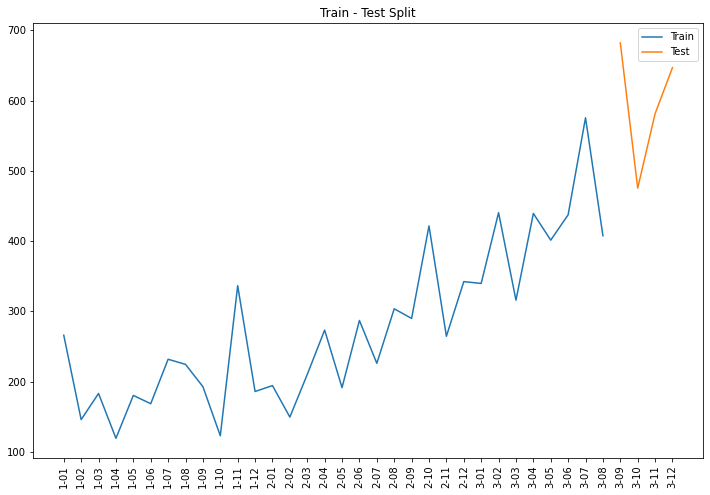

In [3]:
dataset = df

total_data = dataset["Month"].count()
split = (total_data *.9).astype(np.int32)
train = dataset[0:split]
test=dataset[split:]

plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label= 'Train')
plt.plot(test.Month, test.Sales, label= 'Test')
plt.xticks(dataset['Month'],dataset['Month'], rotation='vertical')
plt.legend(loc='best')
plt.title("Train - Test Split")
plt.show()


## Naive Approach

In [4]:
predictions_nv = test.copy()
#Copy the last observed Sales from training data
predictions_nv['Predictions'] = train.tail(1).iloc[0]["Sales"]
print (predictions_nv)

   Month  Sales  Predictions
32  3-09  682.0        407.6
33  3-10  475.3        407.6
34  3-11  581.3        407.6
35  3-12  646.9        407.6


In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test["Sales"], predictions_nv["Predictions"]))
print("Naive Mean Square Error(RMSE): %.3f" % rmse)

Naive Mean Square Error(RMSE): 204.521


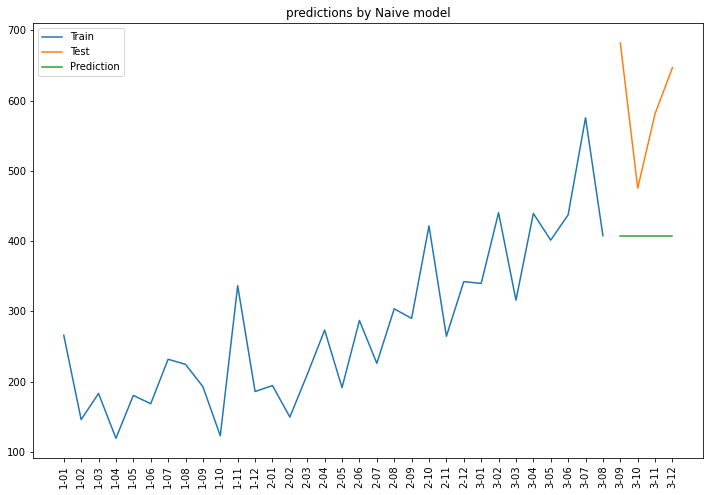

In [6]:
plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label="Train")
plt.plot(test.Month, test.Sales, label="Test")
plt.plot(predictions_nv.Month, predictions_nv.Predictions, label='Prediction')
plt.xticks(dataset["Month"],dataset["Month"],rotation="vertical")
plt.legend(loc='best')
plt.title("predictions by Naive model")
plt.show()

## AutoRegressive Model

In [7]:
from statsmodels.tsa.ar_model import AutoReg
model_ag = AutoReg(endog = train["Sales"],
                  lags =7,
                  trend='c',
                  seasonal = False,
                  exog=None,
                   hold_back = None,
                  period=None,
                  missing='none')
fit_ag = model_ag.fit()
print("Coefficients:\n%s" % fit_ag.params)

Coefficients:
intercept   -33.906470
Sales.L1     -0.319220
Sales.L2      0.212906
Sales.L3      0.189463
Sales.L4      0.505078
Sales.L5      0.496669
Sales.L6      0.170001
Sales.L7      0.112577
dtype: float64


In [8]:
predictions = fit_ag.predict(start=len(train),
                            end=len(train)+len(test)-1,
                            dynamic=False)
predictions.name="Predictions"
result =pd.concat([test,predictions],axis=1).reindex(test.index)
print(result)

   Month  Sales  Predictions
32  3-09  682.0   565.534614
33  3-10  475.3   511.858913
34  3-11  581.3   625.920549
35  3-12  646.9   593.651232


In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test["Sales"],predictions))
print("AR - Root Mean Square Error (RMSE): %.3f" % rmse)

AR - Root Mean Square Error (RMSE): 70.227


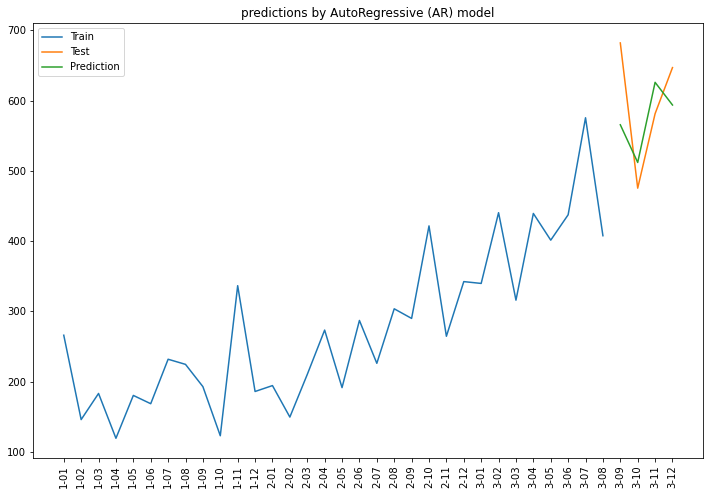

In [10]:
plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label="Train")
plt.plot(test.Month, test.Sales, label="Test")
plt.plot(result.Month, result.Predictions, label='Prediction')
plt.xticks(dataset["Month"],dataset["Month"],rotation="vertical")
plt.legend(loc='best')
plt.title("predictions by AutoRegressive (AR) model")
plt.show()

## MA (Moving Average)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model_ma = ARIMA(endog = train["Sales"],
                order=(0,0,2))
fit_ma = model_ma.fit()
print("Coefficients: \n %s" % fit_ma.params)

Coefficients: 
 const      280.454328
ma.L1        0.435421
ma.L2        0.466753
sigma2    7062.007344
dtype: float64


In [12]:
predictions_ma = fit_ma.predict(start = len(train),
                               end = len(train)+len(test)-1,
                               dynamic = False)
predictions_ma.name = "Predictions"
result_ma = pd.concat([test,predictions_ma],
                     axis = 1).reindex(test.index)
print(result_ma)

   Month  Sales  Predictions
32  3-09  682.0   387.379616
33  3-10  475.3   280.539723
34  3-11  581.3   280.454328
35  3-12  646.9   280.454328


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_ma = sqrt(mean_squared_error(test["Sales"], predictions_ma))
print("MA - Root Mean Square Error (RMSE): %.3f" % rmse_ma)

MA - Root Mean Square Error (RMSE): 295.602


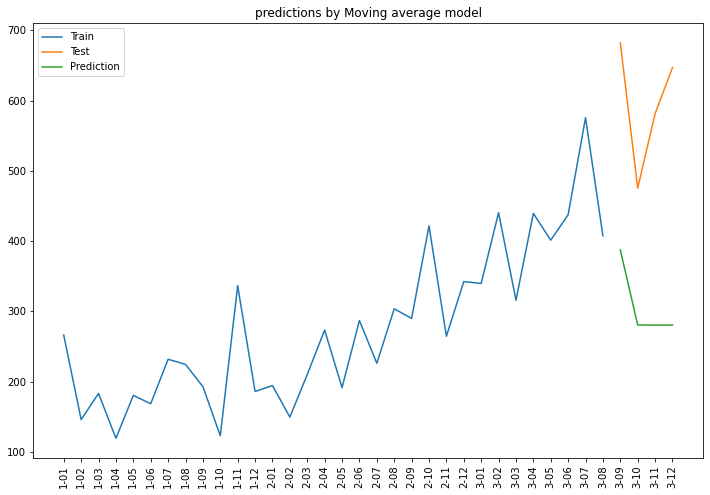

In [14]:
plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label="Train")
plt.plot(test.Month, test.Sales, label="Test")
plt.plot(result_ma.Month, result_ma.Predictions, label='Prediction')
plt.xticks(dataset["Month"],dataset["Month"],rotation="vertical")
plt.legend(loc='best')
plt.title("predictions by Moving average model")
plt.show()

## AutoRegressive Moving Average(ARMA)

In [15]:
from statsmodels.tsa.arima.model import ARIMA
model_arma = ARIMA (endog = train["Sales"],
                   order=(2,0,1))
fit_arma = model_arma.fit()
print("Coefficients:\n%s" % fit_arma.params)

Coefficients:
const      316.937611
ar.L1        0.460582
ar.L2        0.490597
ma.L1       -0.321380
sigma2    4644.719623
dtype: float64


In [16]:
predictions_arma = fit_arma.predict(start= len(train),
                                   end=len(train)+len(test)-1,
                                   dynamic=False)
predictions_arma.name ="predictions"
result_arma = pd.concat([test, predictions_arma],
                       axis=1).reindex(test.index)
print(result_arma)

   Month  Sales  predictions
32  3-09  682.0   495.776607
33  3-10  475.3   443.786370
34  3-11  581.3   463.099753
35  3-12  646.9   446.488908


In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arma = sqrt(mean_squared_error(test["Sales"],predictions_arma))
print("ARMA - Root Mean Square Error (RMSE):%.3f" % rmse_arma)

ARMA - Root Mean Square Error (RMSE):149.840


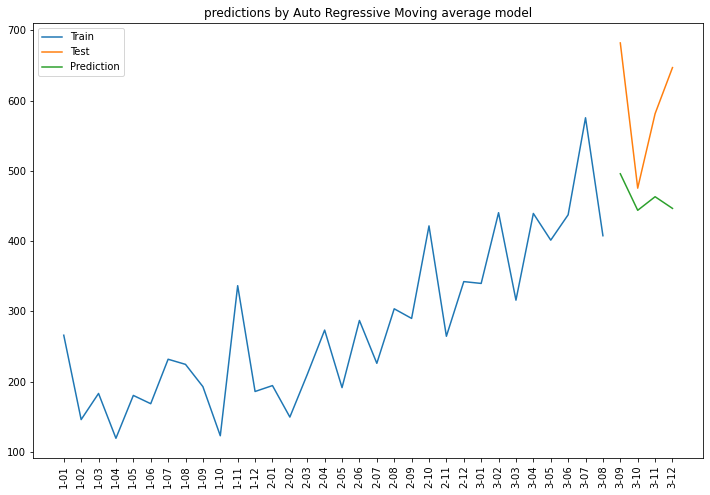

In [18]:
plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label="Train")
plt.plot(test.Month, test.Sales, label="Test")
plt.plot(result_arma.Month, result_arma.predictions, label='Prediction')
plt.xticks(dataset["Month"],dataset["Month"],rotation="vertical")
plt.legend(loc='best')
plt.title("predictions by Auto Regressive Moving average model")
plt.show()

## Seasonal AutoRegressive Integrated Moving Average(SARIMA)

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima = SARIMAX(endog = train["Sales"],
                      order=(1,1,1),
                      seasonal_order=(0,0,0,0))
fit_sarima = model_sarima.fit()
print ("Coefficients: \n%s" % fit_sarima.params)

Coefficients: 
ar.L1       -0.504409
ma.L1       -0.355807
sigma2    4691.948061
dtype: float64


In [22]:
predictions_sarima = fit_sarima.predict(start = len(train),
                                       end = len(train)+len(test)-1,
                                       dynamic=False)
predictions_sarima.name="Predictions"
result_sarima = pd.concat([test, predictions_sarima], axis=1).reindex(test.index)
print(result_sarima)

   Month  Sales  Predictions
32  3-09  682.0   506.029566
33  3-10  475.3   456.380846
34  3-11  581.3   481.424088
35  3-12  646.9   468.792061


In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_sarima = sqrt(mean_squared_error(test["Sales"], predictions_sarima))
print("SARIMA - Root Mean Square Error (RMSE): %.3f" % rmse_sarima)

SARIMA - Root Mean Square Error (RMSE): 135.112


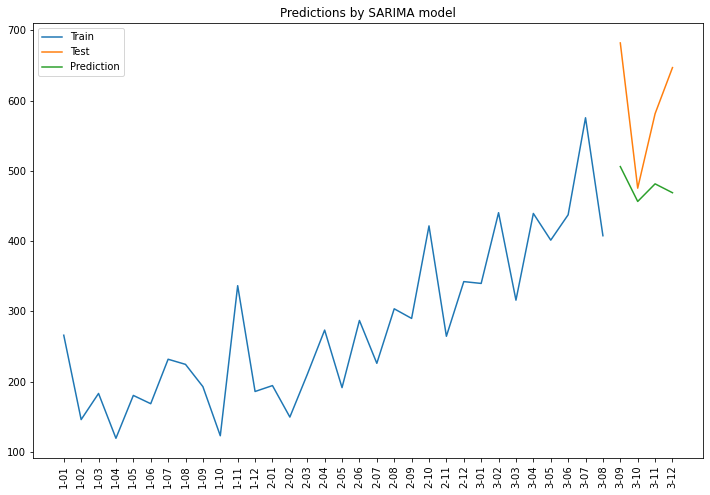

In [25]:
plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label="Train")
plt.plot(test.Month, test.Sales, label="Test")
plt.plot(result_sarima.Month, result_sarima.Predictions, label='Prediction')
plt.xticks(dataset["Month"],dataset["Month"],rotation="vertical")
plt.legend(loc='best')
plt.title("Predictions by SARIMA model")
plt.show()

## XGBoost

In [32]:
dataXGB = dataset.copy()
dataXGB["Target"] = dataXGB.Sales.shift(-1)
dataXGB.dropna(inplace=True)

X = dataXGB.iloc[:,0:1].values
y = dataXGB.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.12, random_state = 0, shuffle=False)

import xgboost
reg = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

reg.fit(X_train, y_train)

ValueError: could not convert string to float: '1-01'